In [1]:
import os
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf 
import plotly.graph_objs as go

In [2]:
init_notebook_mode(connected=True)
sys.path.append("".join([os.environ["HOME"]]))

In [3]:
sys.path

['/Users/siliwang/github_local/python-coding/Numpy/numerical_computing_book',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/siliwang/.local/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/siliwang/.ipython',
 '/Users/siliwang']

In [4]:
os.environ["HOME"]

'/Users/siliwang'

In [5]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [6]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x = [v[0] for v in iris_data.data]
y = [v[1] for v in iris_data.data]

In [8]:
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

layout = go.Layout(
    title = 'Iris Dataset',
    hovermode = 'closest',
    xaxis = dict(
        title = 'sepal length (cm)',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'sepal width (cm)',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = False
    
)

data = [trace]

fig = go.Figure(data = data, layout = layout)
plot(fig)

'temp-plot.html'

In [9]:
df = pd.DataFrame(iris_data.data, columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
                 )
df['class'] = [iris_data.target_names[i] for i in iris_data.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(df, index='class', diag='histogram', size=10, height=800, width=800) 

plot(fig)

'temp-plot.html'

In [11]:
###3D
trace1 = go.Scatter3d( 
    # Extracting data based on label 
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 0], 
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 0], 
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 0], 
    mode='markers', 
    marker=dict( 
        size=12, 
        line=dict( 
            color='rgba(217, 217, 217, 0.14)', 
            width=0.5 
        ), 
        opacity=0.8 
    ) 
) 
 
trace2 = go.Scatter3d( 
    # Extracting data based on label 
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 1], 
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 1], 
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 1], 
    mode='markers', 
    marker=dict( 
        color='#3742fa', 
        size=12, 
        symbol='circle', 
        line=dict( 
            color='rgb(204, 204, 204)', 
            width=1 
        ), 
        opacity=0.9 
    ) 
) 
 
trace3 = go.Scatter3d( 
    # Extracting data based on label 
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 2], 
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 2], 
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 2], 
    mode='markers', 
    marker=dict( 
        color='#ff4757', 
        size=12, 
        symbol='circle', 
        line=dict( 
            color='rgb(104, 74, 114)', 
            width=1 
        ), 
        opacity=0.9 
    ) 
) 
 
data = [trace1, trace2, trace3] 
 
# Layout settings 
layout = go.Layout( 
    scene = dict( 
        xaxis = dict( 
            title= 'sepal length (cm)'), 
        yaxis = dict( 
            title= 'petal length (cm)'), 
        zaxis = dict( 
            title= 'petal width (cm)'),), 
) 
 
fig = go.Figure(data=data, layout=layout) 
plot(fig)

'temp-plot.html'

### K-means Clustering

In [12]:
data = [1,2,3,2,1,3,9,8,11,12,10,11,14,25,26,24,30,22,24,27] 

In [13]:
trace1 = go.Scatter( 
    x=data, 
    y=[0 for x in data], 
    mode='markers', 
    name='Data', 
    marker=dict( 
        size=12 
    ) 
) 

layout = go.Layout( 
title='1D vector',
)

traces = [trace1]

fig = go.Figure(data=traces, layout=layout)

plot(fig)

'temp-plot.html'

In [14]:
#Find 3 clusters which are visible in the data
n_clusters = 3 
c_centers = np.random.choice(data, n_clusters)
print(c_centers)

[27 24 10]


In [15]:
deltas = np.array([np.abs(point- c_centers) for point in data])
deltas

array([[26, 23,  9],
       [25, 22,  8],
       [24, 21,  7],
       [25, 22,  8],
       [26, 23,  9],
       [24, 21,  7],
       [18, 15,  1],
       [19, 16,  2],
       [16, 13,  1],
       [15, 12,  2],
       [17, 14,  0],
       [16, 13,  1],
       [13, 10,  4],
       [ 2,  1, 15],
       [ 1,  2, 16],
       [ 3,  0, 14],
       [ 3,  6, 20],
       [ 5,  2, 12],
       [ 3,  0, 14],
       [ 0,  3, 17]])

In [16]:
deltas.argmin(1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0])

In [17]:
data = np.array(data)

In [18]:
c_centers = np.array([data[np.where(deltas.argmin(1) == i)[0]].mean() for i in range(3)])

In [19]:
c_centers

array([27.66666667, 23.75      ,  6.69230769])

In [20]:
def Kmeans_1D(X, n_clusters, random_seed=442):
    c_centers = np.random.choice(X, n_clusters)
    
    #calculate the distance between each point and cluster centers
    deltas = np.array([np.abs(point - c_centers) for point in X])
    
    #get labels for each point
    labels = deltas.argmin(1)
    print(labels)
    while True:
        new_c_centers = np.array([X[np.where(deltas.argmin(1) == i)[0]].mean() for i in range(n_clusters)])
        
        #calculate distances again
        deltas = np.array([np.abs(point - new_c_centers) for point in X])
        
        labels = deltas.argmin(1)
        
        if np.all(c_centers == new_c_centers):
            break 
        c_centers = new_c_centers
        print(c_centers)
        
    return c_centers

In [21]:
X = data
X

array([ 1,  2,  3,  2,  1,  3,  9,  8, 11, 12, 10, 11, 14, 25, 26, 24, 30,
       22, 24, 27])

In [22]:
Kmeans_1D(X, 3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 0 0 2]
[23.33333333  6.69230769 27.        ]
[23.75        6.69230769 27.66666667]


array([23.75      ,  6.69230769, 27.66666667])

### Multiple Variables

In [23]:
from numpy import genfromtxt
data = genfromtxt('Wholesale customers data.csv', delimiter = ',', skip_header=1)

In [24]:
data[:5]

array([[2.0000e+00, 3.0000e+00, 1.2669e+04, 9.6560e+03, 7.5610e+03,
        2.1400e+02, 2.6740e+03, 1.3380e+03],
       [2.0000e+00, 3.0000e+00, 7.0570e+03, 9.8100e+03, 9.5680e+03,
        1.7620e+03, 3.2930e+03, 1.7760e+03],
       [2.0000e+00, 3.0000e+00, 6.3530e+03, 8.8080e+03, 7.6840e+03,
        2.4050e+03, 3.5160e+03, 7.8440e+03],
       [1.0000e+00, 3.0000e+00, 1.3265e+04, 1.1960e+03, 4.2210e+03,
        6.4040e+03, 5.0700e+02, 1.7880e+03],
       [2.0000e+00, 3.0000e+00, 2.2615e+04, 5.4100e+03, 7.1980e+03,
        3.9150e+03, 1.7770e+03, 5.1850e+03]])

In [25]:
data.shape

(440, 8)

In [26]:
data_norm = data/np.linalg.norm(data)

In [27]:
df= pd.DataFrame(data_norm, 
                columns=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.000004,0.000006,0.024274,0.018501,0.014487,0.000410,0.005124,0.002564
1,0.000004,0.000006,0.013522,0.018796,0.018333,0.003376,0.006310,0.003403
2,0.000004,0.000006,0.012173,0.016877,0.014723,0.004608,0.006737,0.015029
3,0.000002,0.000006,0.025416,0.002292,0.008088,0.012270,0.000971,0.003426
4,0.000004,0.000006,0.043331,0.010366,0.013792,0.007501,0.003405,0.009935


In [28]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


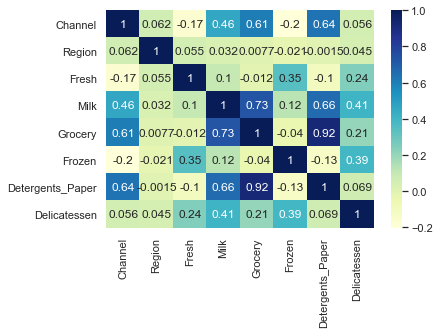

In [29]:
import seaborn as sns; sns.set()
ax = sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True)

In [30]:
df = df[[col for col in df.columns if col not in ['Channel', 'Region']]]

In [31]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.024274,0.018501,0.014487,0.000410,0.005124,0.002564
1,0.013522,0.018796,0.018333,0.003376,0.006310,0.003403
2,0.012173,0.016877,0.014723,0.004608,0.006737,0.015029
3,0.025416,0.002292,0.008088,0.012270,0.000971,0.003426
4,0.043331,0.010366,0.013792,0.007501,0.003405,0.009935


In [32]:
np.array(df)

array([[2.42743830e-02, 1.85013373e-02, 1.44872216e-02, 4.10033781e-04,
        5.12350622e-03, 2.56366915e-03],
       [1.35215345e-02, 1.87964084e-02, 1.83327253e-02, 3.37607253e-03,
        6.30953851e-03, 3.40289717e-03],
       [1.21726384e-02, 1.68765306e-02, 1.47228952e-02, 4.60808992e-03,
        6.73681670e-03, 1.50294625e-02],
       ...,
       [2.78420601e-02, 2.96757159e-02, 5.79469703e-02, 8.37311973e-04,
        2.84360343e-02, 3.57725733e-03],
       [1.97161103e-02, 3.79568654e-03, 4.27661401e-03, 1.98885544e-03,
        3.21895679e-04, 4.07159712e-03],
       [5.34001938e-03, 3.25344561e-03, 4.80927472e-03, 1.24542971e-04,
        9.13953802e-04, 9.96343767e-05]])

In [33]:
def Kmeans_nD(X, n_clusters, random_seed = 442):
    random_state = np.random.RandomState(random_seed)
    indices = random_state.permutation(X.shape[0])[:n_clusters]
    c_centers = X[indices]
    
    deltas = np.array([[np.linalg.norm(feature_vector - c) for c in c_centers] for feature_vector in X])
    
    labels = deltas.argmin(1)
    
    while True:
        new_c_centers = np.array(
            [X[np.where(deltas.argmin(1) == i)[0]].mean(axis=0) for i in range(n_clusters)]
        )
        
        deltas = np.array(
            [[np.linalg.norm(feature_vector -c) for c in new_c_centers] for feature_vector in X]
        )
        
        labels = deltas.argmin(1)
        
        if np.array_equal(c_centers, new_c_centers):
            break
        c_centers = new_c_centers
        
    return c_centers
    

In [34]:
Kmeans_nD(df[['Grocery', 'Detergents_Paper']].values, 3)

array([[0.03143009, 0.01275259],
       [0.00729638, 0.0018119 ],
       [0.09228042, 0.04475029]])